In [791]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%config InlineBackend.figure_format='retina'
sns.set(
    rc={ "figure.figsize": (14,6) },
    style="ticks", context="notebook", font_scale=1.2
)



In [792]:
data=pd.read_csv('adverts.csv')

In [793]:
data.head(5)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [794]:
data.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

## Features


In [795]:
#Considering mileage and year of registration as features to predict the price of the vehicle.
#As seen in the dataset, both mileage and year_of_registration contains NaN values. 
#So to deal with it, I'll replacing the Na values with the mean of the remaining data.


In [796]:
data['mileage']=data['mileage'].fillna(data.mileage.mean())

In [797]:
data['price']=data['price'].fillna(data.price.mean())

In [798]:
data['year_of_registration']=data['year_of_registration'].fillna(0)

In [799]:
data.head(5)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,0.0,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [800]:
#year_of_registration is in float, so I'll convert it to integer format.

In [801]:
data['year_of_registration']=data['year_of_registration'].astype(int)

In [802]:
data.head(1)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,0,73970,SUV,False,Petrol Plug-in Hybrid


In [803]:
#Instead of working on the complete dataset, I'll subset the data accordingly...

In [804]:
model_data=data[['mileage','year_of_registration','price','vehicle_condition','fuel_type','body_type']]

In [805]:
model_data.head()

,mileage,year_of_registration,price,vehicle_condition,fuel_type,body_type
0,0.0,0,73970,NEW,Petrol Plug-in Hybrid,SUV
1,108230.0,2011,7000,USED,Diesel,Saloon
2,7800.0,2017,14000,USED,Petrol,SUV
3,45000.0,2016,7995,USED,Diesel,Hatchback
4,64000.0,2015,26995,USED,Diesel,SUV


In [806]:
model_data['body_type'].unique()

array(['SUV', 'Saloon', 'Hatchback', 'Convertible', 'Limousine', 'Estate',
       'MPV', 'Coupe', nan, 'Pickup', 'Combi Van', 'Panel Van', 'Minibus',
       'Window Van', 'Camper', 'Car Derived Van', 'Chassis Cab'],
      dtype=object)

In [807]:
model_data['fuel_type']=model_data['fuel_type'].map({'Electric':0,'Petrol':1,'Diesel':2,'Petrol Plug-in Hybrid':3,'Diesel Plug-in Hybrid':4,'Petrol Hybrid':5,'Diesel Hybrid':6,'Natural Gas':7,'Bi Fuel':8})

C:\Users\Revati Chavare\AppData\Local\Temp\ipykernel_37668\3799865816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['fuel_type']=model_data['fuel_type'].map({'Electric':0,'Petrol':1,'Diesel':2,'Petrol Plug-in Hybrid':3,'Diesel Plug-in Hybrid':4,'Petrol Hybrid':5,'Diesel Hybrid':6,'Natural Gas':7,'Bi Fuel':8})


In [808]:
model_data['body_type']=model_data['body_type'].map({'Hatchback':0,'SUV':1,'Saloon':2,'Convertible':3,'Limousine':4,'Estate':5,'MPV':6,'Coupe':7,'Pickup':8,'Combi Van':9,'Panel Van':10,'Minibus':11,'Window Van':12,'Camper':13,'Car Derived Van':14,'Chassis Cab':15})

C:\Users\Revati Chavare\AppData\Local\Temp\ipykernel_37668\2578117876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['body_type']=model_data['body_type'].map({'Hatchback':0,'SUV':1,'Saloon':2,'Convertible':3,'Limousine':4,'Estate':5,'MPV':6,'Coupe':7,'Pickup':8,'Combi Van':9,'Panel Van':10,'Minibus':11,'Window Van':12,'Camper':13,'Car Derived Van':14,'Chassis Cab':15})


In [809]:
model_data['vehicle_condition']=model_data['vehicle_condition'].map({'NEW':0,'USED':1})

C:\Users\Revati Chavare\AppData\Local\Temp\ipykernel_37668\3772213299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['vehicle_condition']=model_data['vehicle_condition'].map({'NEW':0,'USED':1})


In [810]:
model_data.head(10)

,mileage,year_of_registration,price,vehicle_condition,fuel_type,body_type
0,0.0,0,73970,0,3.0,1.0
1,108230.0,2011,7000,1,2.0,2.0
2,7800.0,2017,14000,1,1.0,1.0
3,45000.0,2016,7995,1,2.0,0.0
4,64000.0,2015,26995,1,2.0,1.0
5,16000.0,2017,29000,1,1.0,3.0
6,24075.0,2017,5861,1,1.0,0.0
7,99000.0,2013,24475,1,2.0,1.0
8,111236.0,2008,6995,1,2.0,4.0
9,9500.0,2019,79995,1,2.0,1.0


In [811]:
model_data['fuel_type']=model_data['fuel_type'].fillna(9)

C:\Users\Revati Chavare\AppData\Local\Temp\ipykernel_37668\2993386575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['fuel_type']=model_data['fuel_type'].fillna(9)


In [812]:
model_data['body_type']=model_data['body_type'].fillna(15)

C:\Users\Revati Chavare\AppData\Local\Temp\ipykernel_37668\316209389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['body_type']=model_data['body_type'].fillna(15)


In [813]:
model_data['fuel_type']=model_data['fuel_type'].astype(int)

C:\Users\Revati Chavare\AppData\Local\Temp\ipykernel_37668\943036262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['fuel_type']=model_data['fuel_type'].astype(int)


In [814]:
model_data['body_type']=model_data['body_type'].astype(int)

C:\Users\Revati Chavare\AppData\Local\Temp\ipykernel_37668\2799362953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['body_type']=model_data['body_type'].astype(int)


In [815]:
model_data.head()

,mileage,year_of_registration,price,vehicle_condition,fuel_type,body_type
0,0.0,0,73970,0,3,1
1,108230.0,2011,7000,1,2,2
2,7800.0,2017,14000,1,1,1
3,45000.0,2016,7995,1,2,0
4,64000.0,2015,26995,1,2,1


In [816]:
model_data= model_data.iloc[:40000,:]

In [817]:
#t = pd.get_dummies(model_data.crossover_car_and_van, prefix='crossover_car_and_van')
#print(t.head())

In [818]:
#model_data = pd.concat([model_data.drop(columns='crossover_car_and_van'),t], axis=1)

#model_data.head()

In [819]:
#y = pd.get_dummies(model_data.vehicle_condition, prefix='vehicle_condition')

#print(y.head())

In [820]:
#model_data = pd.concat([model_data.drop(columns='vehicle_condition'),y], axis=1)
#model_data.head()

In [821]:
#z = pd.get_dummies(model_data.fuel_type, prefix='fuel_type')
#print(z.head())

In [822]:
#model_data = pd.concat([model_data.drop(columns='fuel_type'),z], axis=1)
#model_data.head()

In [823]:
model_data.head(3)

,mileage,year_of_registration,price,vehicle_condition,fuel_type,body_type
0,0.0,0,73970,0,3,1
1,108230.0,2011,7000,1,2,2
2,7800.0,2017,14000,1,1,1


In [955]:
#Target= price
#Predictors= Mileage and year of registration

In [956]:
X=model_data[['mileage','year_of_registration','body_type','fuel_type','vehicle_condition']]
y=model_data['price']

In [957]:
#X=model_data[['mileage','year_of_registration']]
#y=model_data['price']

In [958]:
from sklearn.model_selection import train_test_split

In [959]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [960]:
X_test.shape

(8000, 5)

In [961]:
reg=linear_model.LinearRegression()

In [962]:
reg.fit(X_train,y_train)

LinearRegression()

In [963]:
reg.predict(X_test)

array([15865.89017635, 24613.03416229, 18044.71760963, ...,
       14812.67704713, 16974.10056977, 29791.9949776 ])

In [964]:
reg.score(X_train,y_train)

0.15130031437695945

In [965]:
reg.coef_

array([-2.10606308e-01, -3.22999257e+00,  2.08348633e+03,  1.04408934e+03,
       -3.42615656e+03])

In [966]:
reg.intercept_

29396.191196895372

In [967]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [968]:
X_train=scaler.fit_transform(X_train)

In [969]:
X_test=scaler.transform(X_test)

In [970]:
scaler.inverse_transform(X_train)

array([[1.0000e+01, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
       [6.6260e+04, 2.0150e+03, 6.0000e+00, 1.0000e+00, 1.0000e+00],
       [5.7614e+04, 2.0090e+03, 0.0000e+00, 2.0000e+00, 1.0000e+00],
       ...,
       [4.3000e+04, 2.0150e+03, 0.0000e+00, 1.0000e+00, 1.0000e+00],
       [2.0280e+04, 2.0170e+03, 7.0000e+00, 2.0000e+00, 1.0000e+00],
       [2.8272e+04, 2.0140e+03, 0.0000e+00, 1.0000e+00, 1.0000e+00]])

In [971]:
from sklearn.model_selection import cross_val_score

In [972]:
scores = cross_val_score(reg, X, y, cv=5, scoring='neg_root_mean_squared_error')


In [973]:
reg.fit(X, y)

LinearRegression()

In [974]:
final_predictions = reg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [975]:
final_predictions

array([26715.97521806, 31114.75535715, 31114.59902212, ...,
       27642.13869961, 26716.00690696, 32446.92473043])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

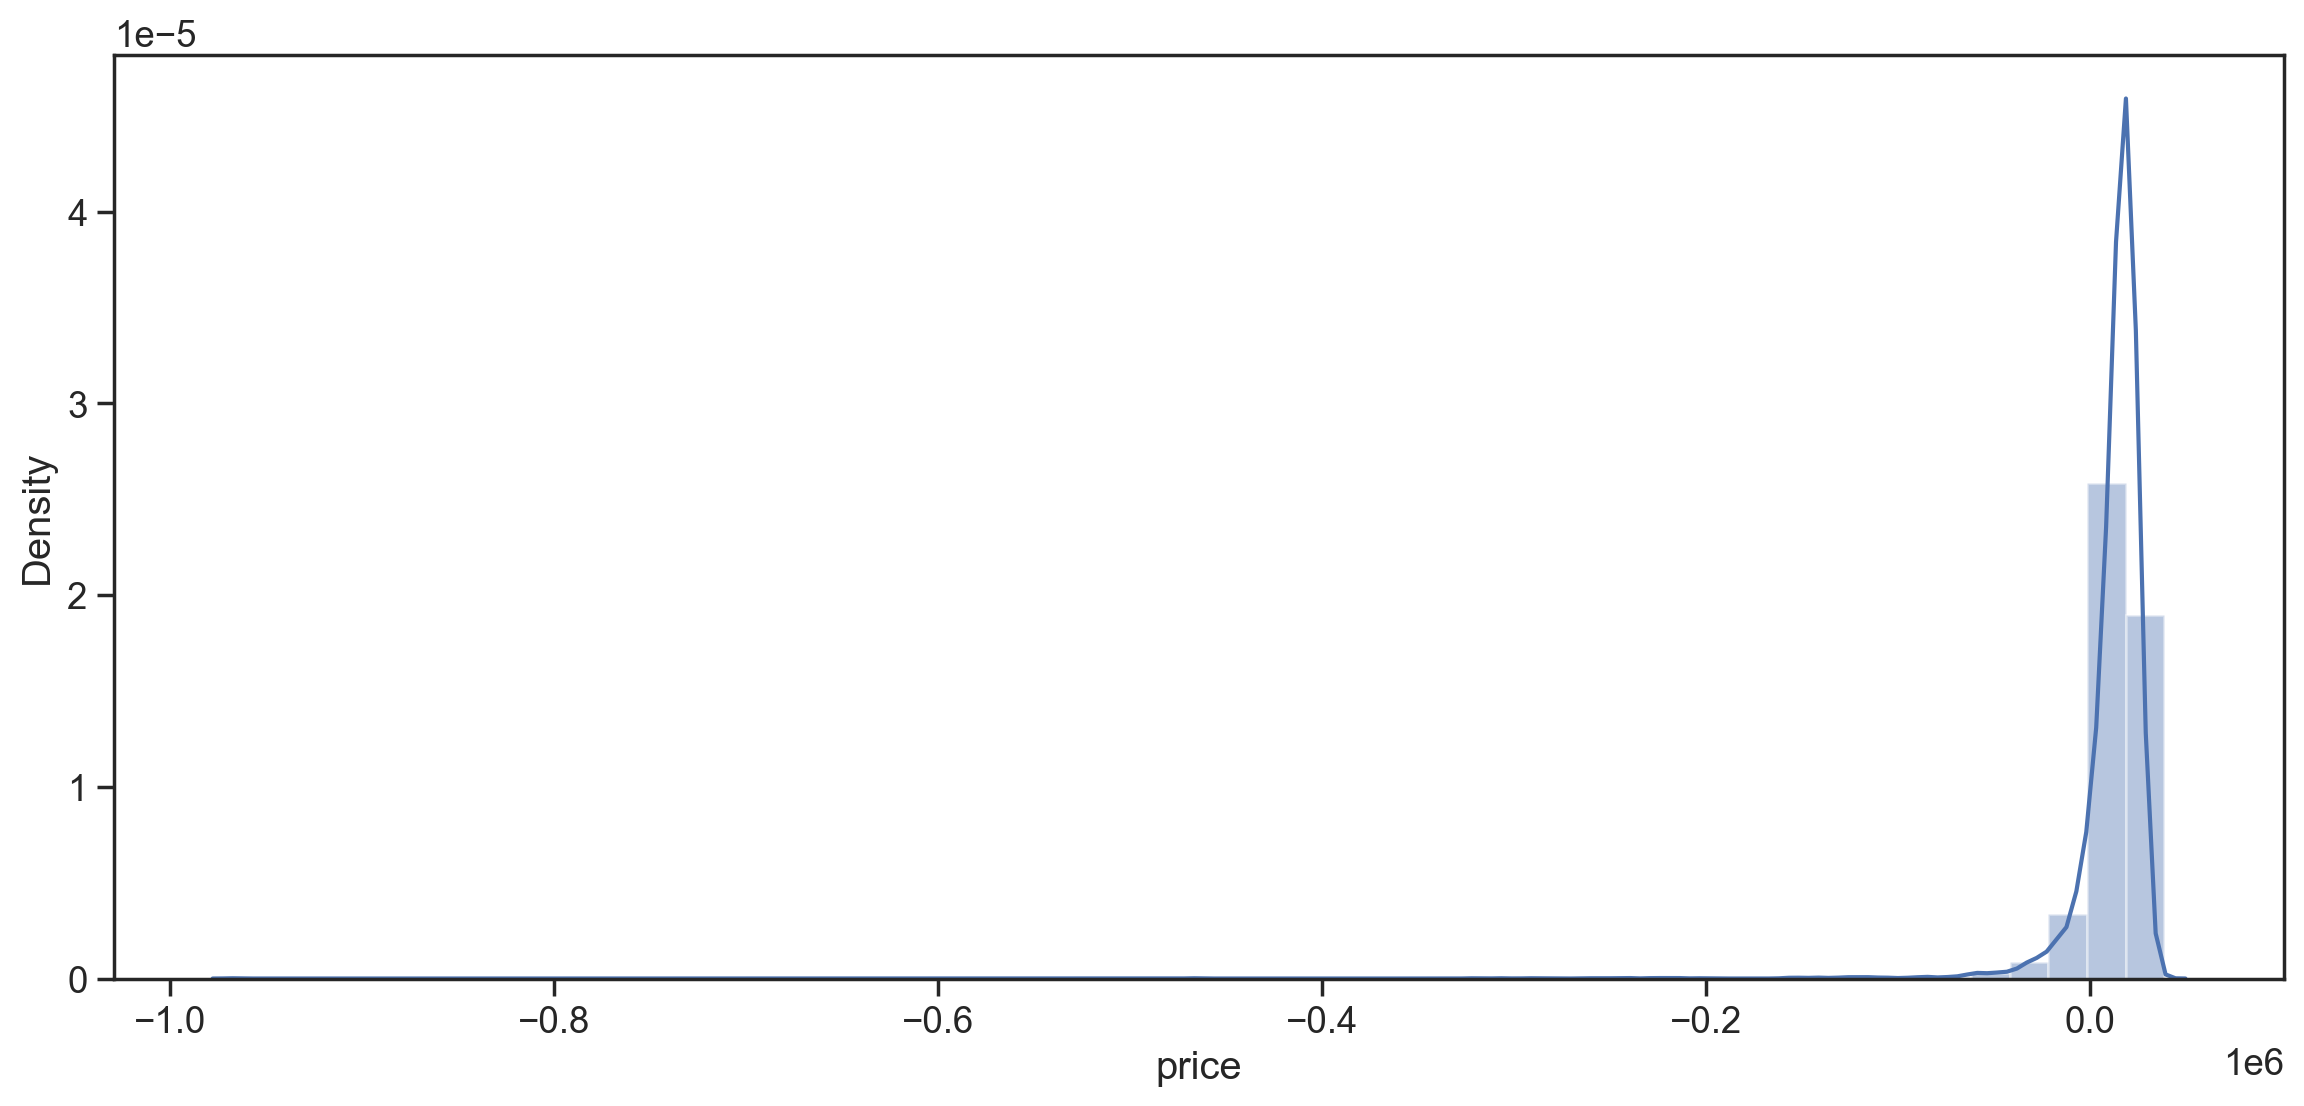

In [976]:
sns.distplot(final_predictions-y_test,kde=True)

In [977]:
from sklearn.metrics import r2_score

In [978]:
score=r2_score(final_predictions,y_test)

In [979]:
score

-102.62026000044757

In [980]:
model_data

,mileage,year_of_registration,price,vehicle_condition,fuel_type,body_type
0,0.0,0,73970,0,3,1
1,108230.0,2011,7000,1,2,2
2,7800.0,2017,14000,1,1,1
3,45000.0,2016,7995,1,2,0
4,64000.0,2015,26995,1,2,1
...,...,...,...,...,...,...
39995,1719.0,2019,9247,1,1,0
39996,112000.0,2014,14495,1,2,7
39997,10.0,2020,40844,1,2,1
39998,10.0,0,19590,0,1,0
